In [1]:
import My_Algorithms.PSO_UDA as pso
import My_Algorithms.HHO_UDA as hho
import My_Algorithms.GWO_UDA as gwo
import My_Problems.MLTHIMS_CE as CS
import My_Problems.MLTHIMS_Otsu as Otsu
import My_Problems.MLTHIMS_Tsallis as Tsallis

from performance_metric import My_PSNR
from sewar.full_ref import mse, rmse, psnr, uqi, ssim, ergas, scc, rase, sam, msssim, vifp
from skimage.metrics import structural_similarity as ssim2
from skimage.metrics import peak_signal_noise_ratio as psnr3
from skimage.metrics import variation_of_information as vinf


import imageio

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import math
import time

import pygmo as pg

def load_image(file_name):
    
    img = Image.open(file_name)
    #print(img.format, img.size, img.mode)
    
    #The size attribute is a 2-tuple containing width and height (in pixels)
    #attribute defines the number and names of the bands in the image, and also the pixel type and depth. 
    #Common modes are “L” (luminance) for greyscale images, “RGB” for true color images, and “CMYK” for pre-press images
    if img.mode =='RGB':
        #print("RGB")
        gray_img=img.convert('L') #Convert photo to gray scale
    else:
        #print ("Grey")
        gray_img = img
    
    gray_img_array=np.asarray(gray_img) #Convert variable type to numpy array
    #print(gray_img_array)
    
    #------------------- Computing the histogram
    #his = histogram (gray_img_array)
    BINS = np.array(range(0,257))
    his = np.histogram(gray_img_array, bins=BINS, range=None, normed=None, weights=None, density=None) # his is a tuple
    
    #print (his[0])
    plt.imshow(gray_img_array,cmap='gray', vmin = 0, vmax = 255)
    plt.show()
    
    return his[0], img, gray_img 

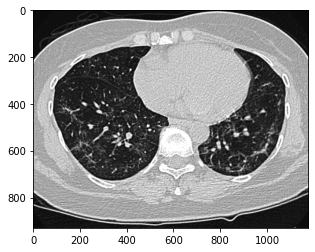

Execution time --------- =  7.983200788497925
NUmber of Evaluations 8507
Best individual in the population [167.65575294  51.47742969 156.23054296 165.99739403  31.86774711
 195.4326135  164.11277908  86.6221421  175.67487534 123.70485155
 235.96035507 135.77545811  23.53557933  79.08213178  65.29050072
 206.69083797 160.6413818   19.97893385 229.14511141 138.18130075]
Best fitness in the population [-6.98192699e+08]
final fitness vector [[-6.98192699e+08]
 [-6.98192699e+08]
 [-6.98192699e+08]
 [-6.98192699e+08]
 [-6.98192699e+08]
 [-6.98192699e+08]
 [-6.98192699e+08]
 [-6.98192699e+08]
 [-6.98192699e+08]
 [-6.98192699e+08]]
Champion vector [ 20.  24.  32.  51.  65.  79.  87. 124. 136. 138. 156. 161. 164. 166.
 168. 176. 195. 207. 229. 236.]
Champion fitness [-6.98192699e+08]
tyyyype <class 'numpy.ndarray'>
My_My_PSNR1 25.66742449970537
skimage 25.66742449970537
sewar 25.66742449970537
<class 'tuple'>
gggggggggggggggggggggg 240
similarity sewar (0.8209099841401963, 0.8672319477170122)


In [2]:
file_name = 'COVID19-images/image2.jpg'
h, img, gray_img= load_image(file_name)

#----- for Otsu ----------------
Total_pixels = gray_img.size[0] * gray_img.size[1]
Lmax= 256;
level = 2;
n_countR = h


probR= np.zeros(Lmax)
for i in range(Lmax):
    probR[i]=n_countR[i]/Total_pixels;
#------------------------------

problems=[CS.MLTHIMS_CE(hist = h, dim = 20), Otsu.MLTHIMS_Otsu(hist = h, probR = probR, dim = 20), Tsallis.MLTHIMS_Tsallis(hist = h, probR = probR, dim = 10)]

udp = problems[0]

#prob = pg.problem(CS.MLTHIMS_CE(hist = h, dim = 20))   #Cross Entropy AS Objective Function
#prob = pg.problem(Otsu.MLTHIMS_Otsu(hist = h, probR = probR, dim = 20))    #OTSU'S BETWEEN CLASS VARIANCE AS OBJ FUNC 
#prob = pg.problem(Tsallis.MLTHIMS_Tsallis(hist = h, probR = probR, dim = 10))    #OTSU'S BETWEEN CLASS VARIANCE AS OBJ FUNC 
#prob = pg.problem(pg.schwefel(dim = 10))
#print(prob)

prob = pg.problem(udp)
# The initial population
pop = pg.population(prob, size = 10)

#print("Initial Population", pop)

#algo = pg.algorithm(pso.my_PSO(gen = 500))
algo = pg.algorithm(hho.my_HHO(gen = 500))
#algo = pg.algorithm(pg.pso(gen = 500))

start_time = time.time();
# The actual optimization process
evolved_pop = algo.evolve(pop)

print("Execution time --------- = ", time.time() - start_time)
    
print("NUmber of Evaluations", evolved_pop.problem.get_fevals())
extra_info = algo.get_extra_info()
#print (type(extra_info))
#print("Extra info ......................" , extra_info)
#li = list(extra_info.split("$"))
#print(type(li))
#print("Extra info ......................" , li)
# Getting the best individual in the population
best_fitness = evolved_pop.get_f()
best_individual_vector = evolved_pop.get_x()[evolved_pop.best_idx()]
best_individual_fitness = evolved_pop.get_f()[evolved_pop.best_idx()]
print("Best individual in the population", best_individual_vector) 
print("Best fitness in the population", best_individual_fitness) 
print("final fitness vector", best_fitness) 


# Getting the Champion decision vector
champion_individual = evolved_pop.champion_x
champion_individual_fitness = best_fitness2 = evolved_pop.champion_f   #better

print("Champion vector" , np.sort(np.round(champion_individual)))
print("Champion fitness" , champion_individual_fitness)

#======= Evaluate best solution #==========================================================
gray_img_array=np.asarray(gray_img)
champion_individual= np.sort(champion_individual)
champion_individual= np.round(champion_individual)
regions = np.digitize(gray_img_array, bins = champion_individual)
regions = (regions*int(255/(len(champion_individual)))).astype(np.uint8)   #  len(champion_individual)-1   bad results

print("tyyyype", type(regions))

imageio.imwrite('filename.jpg', regions)


#X = np.matrix(gray_img_array)

#y = np.matrix(regions)

#psnr = ssim(gray_img_array,regions)
psnr1 = My_PSNR(gray_img_array,regions)
psnr3 = psnr3(gray_img_array,regions)
psnr = psnr(gray_img_array,regions)
print("My_My_PSNR1", psnr1)    # My_My_PSNR1
print("skimage", psnr3)    # skimage
print("sewar", psnr)     # sewar


s = ssim(gray_img_array, regions) 
print(type(s))
s2 = ssim2(gray_img_array, regions, data_range=255 - 0)

print("gggggggggggggggggggggg", regions.max() - regions.min())

vinf = vinf(gray_img_array, regions) 

print("similarity sewar", s)
print("similarity skiimage", s2)
print("vinf", vinf)